In [1]:
print ( "Hello World!")

Hello World!


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
from dateutil.parser import parse 
import matplotlib as mpl
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score

In [4]:
df = pd.read_csv("/Users/ms/Desktop/Boot Camp /3rd Project/Bike-Sharing-Dataset/day.csv" )

In [5]:
df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [6]:
# convert the Temprutre to Celsius , humidity and windspeed  

t_min= -8
t_max=39
t_min_a=16
t_max_a= -50

df['temp'] = df['temp'] * (t_max-t_min) + t_min 
df['atemp'] = df['atemp'] *  (t_max_a-t_min_a) + t_min_a
df['real_hum']= df['hum']*100
df['real_windspeed']= df['windspeed']*67

In [9]:
# conversion date type from object to timestamp.

df['dteday'] = pd.to_datetime(df['dteday'])

Coefficients: [138.20753507]
Intercept: 2427.1224209994625
Mean squared error (MSE): 1881032.41
Coefficient of determination (R^2): 0.49


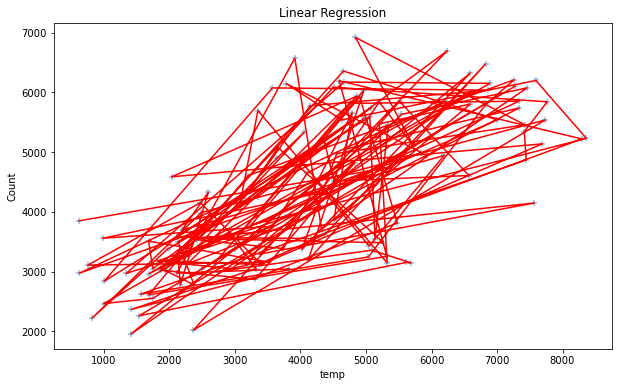

In [64]:
# split dataset to  X , Y variables, which we gonna model it 
y = df['cnt']
X = df['temp']

# Perform 80/20 Data split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

# reshape because the features are not 2D array
X_train = X_train.values.reshape(-1,1)
X_test = X_test.values.reshape(-1,1)


# LinearRegression Model 
from sklearn import linear_model
lin = linear_model.LinearRegression()

# Build training model
lin.fit(X_train, y_train)

# Apply trained model to make prediction (on test set)
y_pred = lin.predict(X_test)


# Predection result
print('Coefficients:', lin.coef_)
print('Intercept:', lin.intercept_)
print('Mean squared error (MSE): %.2f'
      % mean_squared_error(y_test, y_pred))
print('Coefficient of determination (R^2): %.2f'
      % r2_score(y_test, y_pred))


# Visualising the Linear Regression results
plt.figure(figsize=(10,6))
plt.scatter(y_test, y_pred, marker="+", alpha=0.5)
plt.plot(y_test, y_pred, color = 'red')


plt.title('Linear Regression')
plt.xlabel('temp')
plt.ylabel('Count')
plt.show()




***Polynomial Regression*** / Model Building

RMSE Train: 1384.08,  Test: 1552.03
R^2 Train: 0.47,  Test: 0.43


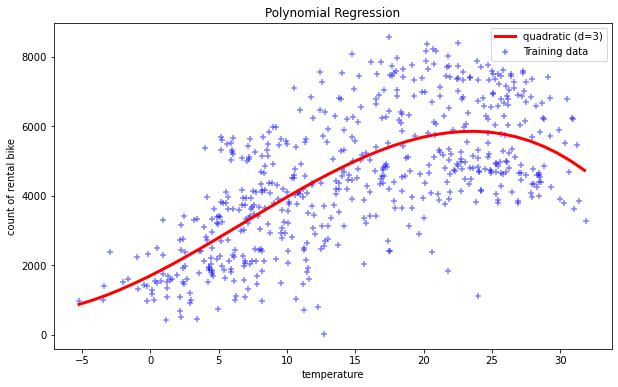

In [67]:
# independent variable
X = df["temp" ] # temperature
# depandent variable
y = df["cnt"]

# train, test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=0)
X_train = X_train.values.reshape(-1,1)
X_test = X_test.values.reshape(-1,1)

# LinearRegression
from sklearn.linear_model import LinearRegression
lr = LinearRegression()

# instantiate 2 dimensional polynomial features
from sklearn.preprocessing import PolynomialFeatures
quadratic = PolynomialFeatures(
               degree = 3,                   # n dimension der polynomial 
               interaction_only = False,     # if true
               include_bias = True,          # if True
               order = "C"                   # 
)

# Data calculation/conversion
X_quad_train  = quadratic.fit_transform(X_train)
# Fit the above data to a regression model
lr.fit(X_quad_train, y_train)

"""plot the data"""
# plot for drawing polynomial curves
fig  = plt.figure(figsize=(10,6))
X_fit          = np.arange(X_train.min(), X_train.max(), 1)[:, np.newaxis]
X_quad_fit     = quadratic.fit_transform(X_fit)
y_quad_predict = lr.predict(X_quad_fit)

plt.plot(X_fit, 
         y_quad_predict, 
         label='quadratic (d=3)',
         color='red', 
         lw=3
        )

# Transform training data & test data for inference
X_quad_train         = quadratic.fit_transform(X_train)
X_quad_test          = quadratic.fit_transform(X_test)

# root mean squared error (RMSE)
print('RMSE Train: %.2f,  Test: %.2f' % (
        mean_squared_error(y_train, lr.predict(X_quad_train), squared=False),   # train
        mean_squared_error(y_test, lr.predict(X_quad_test),   squared=False)    # test
      ))

# the Correlation Coefficient (R^2)
print('R^2 Train: %.2f,  Test: %.2f' % (
        r2_score(y_train, lr.predict(X_quad_train)), # train
        r2_score(y_test,  lr.predict(X_quad_test))   # test
      ))

# Plot training data
plt.scatter(X_train, y_train, label= 'Training data', color='blue', marker="+", alpha=0.5)
# Chart formatting
plt.title('Polynomial Regression')
plt.xlabel('temperature')
plt.ylabel('count of rental bike')
plt.legend(loc='upper right')
plt.show()

RMSE Train: 1234.45,  Test: 1334.42
R^2 Train: 0.35,  Test: 0.35


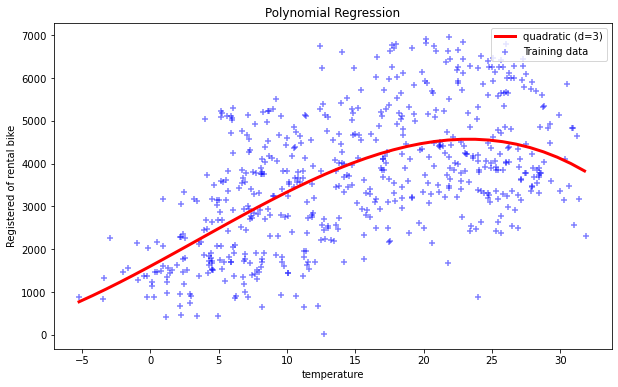

In [68]:
# independent variable
X = df["temp" ] # temperature
# depandent variable
y = df["registered"]

# train, test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=0)
X_train = X_train.values.reshape(-1,1)
X_test = X_test.values.reshape(-1,1)

# LinearRegression
from sklearn.linear_model import LinearRegression
lr = LinearRegression()

# instantiate 2 dimensional polynomial features
from sklearn.preprocessing import PolynomialFeatures
quadratic = PolynomialFeatures(
               degree = 3,                   # n dimension der polynomial 
               interaction_only = False,     # if true
               include_bias = True,          # if True
               order = "C"                   # 
)

# Data calculation/conversion
X_quad_train  = quadratic.fit_transform(X_train)
# Fit the above data to a regression model
lr.fit(X_quad_train, y_train)

"""plot the data"""
# plot for drawing polynomial curves
fig  = plt.figure(figsize=(10,6))
X_fit          = np.arange(X_train.min(), X_train.max(), 1)[:, np.newaxis]
X_quad_fit     = quadratic.fit_transform(X_fit)
y_quad_predict = lr.predict(X_quad_fit)

plt.plot(X_fit, 
         y_quad_predict, 
         label='quadratic (d=3)',
         color='red', 
         lw=3
        )

# Transform training data & test data for inference
X_quad_train         = quadratic.fit_transform(X_train)
X_quad_test          = quadratic.fit_transform(X_test)

# root mean squared error (RMSE)
print('RMSE Train: %.2f,  Test: %.2f' % (
        mean_squared_error(y_train, lr.predict(X_quad_train), squared=False),   # train
        mean_squared_error(y_test, lr.predict(X_quad_test),   squared=False)    # test
      ))

# the Correlation Coefficient (R^2)
print('R^2 Train: %.2f,  Test: %.2f' % (
        r2_score(y_train, lr.predict(X_quad_train)), # train
        r2_score(y_test,  lr.predict(X_quad_test))   # test
      ))

# Plot training data
plt.scatter(X_train, y_train, label= 'Training data', color='blue', marker="+", alpha=0.5)
# Chart formatting
plt.title('Polynomial Regression')
plt.xlabel('temperature')
plt.ylabel('Registered of rental bike')
plt.legend(loc='upper right')
plt.show()

RMSE Train: 544.81,  Test: 622.11
R^2 Train: 0.35,  Test: 0.27


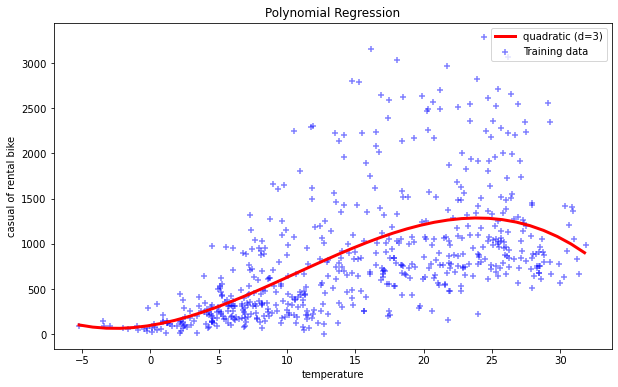

In [69]:
# independent variable
X = df["temp" ] # temperature
# depandent variable
y = df["casual"]

# train, test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=0)
X_train = X_train.values.reshape(-1,1)
X_test = X_test.values.reshape(-1,1)

# LinearRegression
from sklearn.linear_model import LinearRegression
lr = LinearRegression()

# instantiate 2 dimensional polynomial features
from sklearn.preprocessing import PolynomialFeatures
quadratic = PolynomialFeatures(
               degree = 3,                   # n dimension der polynomial 
               interaction_only = False,     # if true
               include_bias = True,          # if True
               order = "C"                   # 
)

# Data calculation/conversion
X_quad_train  = quadratic.fit_transform(X_train)
# Fit the above data to a regression model
lr.fit(X_quad_train, y_train)

"""plot the data"""
# plot for drawing polynomial curves
fig  = plt.figure(figsize=(10,6))
X_fit          = np.arange(X_train.min(), X_train.max(), 1)[:, np.newaxis]
X_quad_fit     = quadratic.fit_transform(X_fit)
y_quad_predict = lr.predict(X_quad_fit)

plt.plot(X_fit, 
         y_quad_predict, 
         label='quadratic (d=3)',
         color='red', 
         lw=3
        )

# Transform training data & test data for inference
X_quad_train         = quadratic.fit_transform(X_train)
X_quad_test          = quadratic.fit_transform(X_test)

# root mean squared error (RMSE)
print('RMSE Train: %.2f,  Test: %.2f' % (
        mean_squared_error(y_train, lr.predict(X_quad_train), squared=False),   # train
        mean_squared_error(y_test, lr.predict(X_quad_test),   squared=False)    # test
      ))

# the Correlation Coefficient (R^2)
print('R^2 Train: %.2f,  Test: %.2f' % (
        r2_score(y_train, lr.predict(X_quad_train)), # train
        r2_score(y_test,  lr.predict(X_quad_test))   # test
      ))

# Plot training data
plt.scatter(X_train, y_train, label= 'Training data', color='blue', marker="+", alpha=0.5)
# Chart formatting
plt.title('Polynomial Regression')
plt.xlabel('temperature')
plt.ylabel('casual of rental bike')
plt.legend(loc='upper right')
plt.show()

Coefficients: [138.20753507]
Intercept: 2427.1224209994625
Mean squared error (MSE): 1881032.41
Coefficient of determination (R^2): 0.49


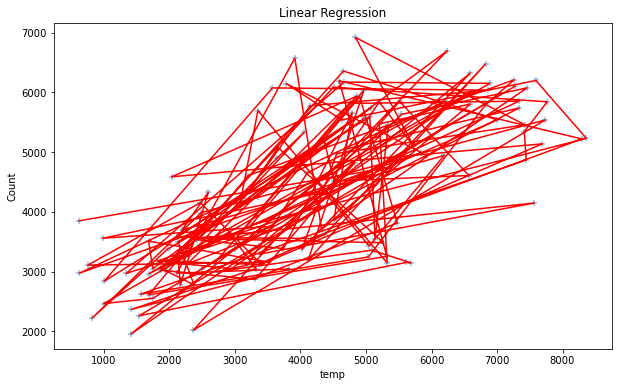

In [70]:
# split dataset to  X , Y variables, which we gonna model it 
y = df['cnt']
X = df['temp']

# Perform 80/20 Data split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

# reshape because the features are not 2D array
X_train = X_train.values.reshape(-1,1)
X_test = X_test.values.reshape(-1,1)


# LinearRegression Model 
from sklearn import linear_model
lin = linear_model.LinearRegression()

# Build training model
lin.fit(X_train, y_train)

# Apply trained model to make prediction (on test set)
y_pred = lin.predict(X_test)


# Predection result
print('Coefficients:', lin.coef_)
print('Intercept:', lin.intercept_)
print('Mean squared error (MSE): %.2f'
      % mean_squared_error(y_test, y_pred))
print('Coefficient of determination (R^2): %.2f'
      % r2_score(y_test, y_pred))


# Visualising the Linear Regression results
plt.figure(figsize=(10,6))
plt.scatter(y_test, y_pred, marker="+", alpha=0.5)
plt.plot(y_test, y_pred, color = 'red')


plt.title('Linear Regression')
plt.xlabel('temp')
plt.ylabel('Count')
plt.show()




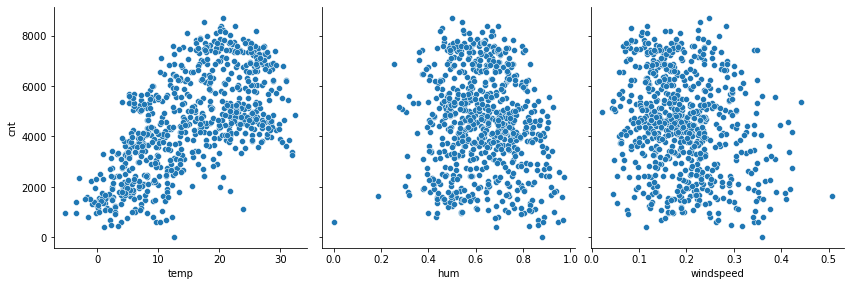

In [73]:
#How Count are related with other variables
sns.pairplot(df, x_vars=['temp', 'hum', 'windspeed'], y_vars='cnt', height=4, aspect=1, kind='scatter')
plt.show()


/Users/ms/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/ms/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/ms/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility)

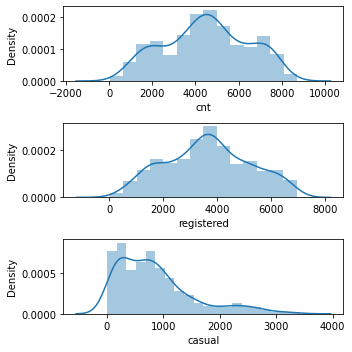

In [84]:
# Distribution of the target variable
fig, axs = plt.subplots(3, figsize = (5,5))
plt1 = sns.distplot(df['cnt'], ax = axs[0])
plt2 = sns.distplot(df['registered'], ax = axs[1])
plt3 = sns.distplot(df['casual'], ax = axs[2])
plt.tight_layout()


***Simple Linear Regression*** / Model Building

In [114]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics

#Setting the value for X and Y
X = df[['temp']]
y = df['cnt']

#plitting the dataset
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 100)

#Implementing the linear model
#Fitting the Multiple Linear Regression model
from sklearn.linear_model import LinearRegression
slr= LinearRegression()  
slr.fit(X_train, y_train)


#Printing the model Intercept and Coefficient
print('Intercept: ', '%.2f' % slr.intercept_)
print('Coefficient:', slr.coef_)
print('Regression Equation: Count =', '%.2f' % slr.intercept_ , '+',  slr.coef_ , '*',  'Tempreture')

# print the R-squared value for the model
from sklearn.metrics import accuracy_score
print('R squared value of the model: {:.2f} '.format(slr.score(X,y)*100))





Intercept:  2320.58
Coefficient: [145.03360143]
Regression Equation: Count = 2320.58 + [145.03360143] * Tempreture
R squared value of the model: 39.32 


InvalidIndexError: (slice(None, None, None), None)

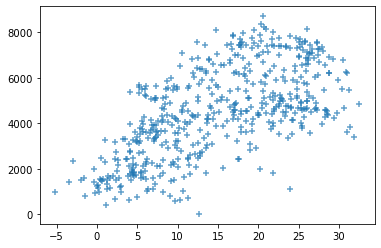

In [121]:
#y_plot =  2320.58 + 145.03*X_train
#Line of best fit
plt.scatter(X_train, y_train, marker="+", alpha=0.7)
plt.plot(X_train,( 2320.58 + 145.03) * X_train)
sns.regplot(X_train)
plt.show()

In [107]:
#Prediction of Test and Training set result  
y_pred_slr= slr.predict(X_test)  
X_pred_slr= slr.predict(X_train)  
#Predicted values
print("Prediction for test set: {}".format(y_pred_slr))

#Actual value and the predicted value
slr_diff = pd.DataFrame({'Actual value': y_test, 'Predicted value':  y_pred_slr})
slr_diff


Prediction for test set: [6113.69383177 5852.38708214 4364.10288104 6386.35700245 6034.16480146
 2966.7041313  6250.02541711 5801.26273764 5863.75031978 6397.7134235
 5625.17004544 6147.7767281  5216.17528942 3869.90088418 4312.97853654
 5937.59432298 6051.20624962 2144.27020958 3500.66723502 4528.83915218
 5829.66742345 5312.74576789 5795.58452711 2943.9844726  5369.54832292
 3608.60095114 5909.19645375 5488.8384601  5591.0871491  6357.95231664
 6454.52279512 5165.05094491 5443.39232612 5119.60481094 4000.55425899
 5295.70431972 6221.6207313  3625.64239931 2683.66612698 4756.05618889
 3818.77653968 4716.29508203 3352.97922862 6948.72479197 4199.36660989
 6460.20100565 3323.83153568 5500.20169773 3188.24295748 3494.98902449
 5579.72391146 6125.05025282 4256.1759815  5005.99970088 2887.17510099
 6539.73003595 3631.32060983 4585.64170722 4841.26342973 3512.03047266
 3534.75013136 6715.82272816 2449.26441572 6306.82797214 3994.86923188
 5585.40893857 5642.2114936  3335.93778046 4636.76605

,Actual value,Predicted value
184,6043,6113.693832
535,6825,5852.387082
299,2659,4364.102881
221,4780,6386.357002
152,4968,6034.164801
...,...,...
702,6234,4244.812744
127,4333,4761.734399
640,4639,5187.770604
72,2046,3377.178085


In [111]:
# 0 means the model is perfect. Therefore the value should be as close to 0 as possible
meanAbErr = metrics.mean_absolute_error(y_test, y_pred_slr)
meanSqErr = metrics.mean_squared_error(y_test, y_pred_slr)
rootMeanSqErr = np.sqrt(metrics.mean_squared_error(y_test, y_pred_slr))

print('Mean Absolute Error:', meanAbErr)
print('Mean Square Error:', meanSqErr)
print('Root Mean Square Error:', rootMeanSqErr)

Mean Absolute Error: 1242.5160845370824
Mean Square Error: 2245350.28368578
Root Mean Square Error: 1498.4492929978578
